In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px 
 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pickle
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk 
import seaborn as sns

## Functions of  Exploration & EDA 

In [2]:
def Exploration(Datafarme):
    shape_data=Datafarme.shape
    info_data=Datafarme.info()
    print('\nthe shape of data is',shape_data,'\nconsist',Datafarme.shape[0],'row','\nconsist',Datafarme.shape[1],'column','\n\n\n',info_data)

In [3]:
def describtion(df,column_name):
    min_value=df[column_name].min()
    max_value=df[column_name].max()
    averge_value=df[column_name].mean()
    print(f'Data in column {column_name} Ranged From {min_value} to {max_value} by averge {averge_value}')
     
    

In [4]:
def plot_all_distplots(df):
    
    num_vars = len(df.columns)
    cols = 3  
    rows = (num_vars + cols - 1) // cols  
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    
    
    axes = axes.flatten()
    
    
    for i, col in enumerate(df.columns):
        sns.histplot(df[col], kde=True, ax=axes[i],color='red')
        axes[i].set_title(f'Distribution of {col}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

In [5]:
def knowing_nulls_duplicate(df):
    null_value=df.isnull().sum()
    print(null_value)
    print('-'*200)
    null_value_count=df.isnull().sum().sum()
    print(f'Data have {null_value_count} null value')
    print('-'*200)
    print('Duplicate Values :')
    duplicate_value=df.duplicated().sum()
    print(f'Data have {duplicate_value} duplicaed value')
    if duplicate_value > 0:
        print(f'duplicated value is :')
        print(df[df.duplicated()])
    else: 
        print('-'*200)
        
    

In [6]:
def plot_null_value(df):
    bar_nulls=msno.bar(df)
    matrix_nulls=msno.matrix(df)
    return bar_nulls,matrix_nulls
    

In [7]:
def plot_boxplots_with_exam_score(df, target_col='Exam_Score'):

    sns.set(style="whitegrid", palette="muted")
    
    categorical_columns = df.select_dtypes(include=['category', 'object']).columns
    
    num_vars = len(categorical_columns)
    cols = 2  
    rows = (num_vars + cols - 1) // cols  
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6 * rows))
    fig.suptitle('Boxplot of Exam Score vs Categorical Columns', fontsize=20, fontweight='bold')
    
    axes = axes.flatten()
    
    for i, col in enumerate(categorical_columns):
        sns.boxplot(x=df[col], y=df[target_col], ax=axes[i], palette="Set2")
        
        axes[i].set_title(f'{col} vs {target_col}', fontsize=16, fontweight='bold')
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel(target_col, fontsize=12)
        
    
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, linestyle='--', alpha=0.7)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [18]:
def knowing_outliers(df):
    # Initialize an empty list to store column names with outliers
    columns_with_outliers = []
    
    # Loop through each column in the DataFrame
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_Bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # Count the number of outliers in the column
        outliers_count = df[(df[column] < lower_Bound) | (df[column] > upper_bound)].shape[0]
        
        # If outliers are present, add the column name to the list
        if outliers_count > 0:
            columns_with_outliers.append(column)
    
    # Return the list of column names with outliers
    return columns_with_outliers


In [19]:
def treat_outliers(dataFrame,x):
    Q1=dataFrame[x].quantile(0.25)
    Q3=dataFrame[x].quantile(0.75)
    IQR=Q3-Q1
    lower_Bound=Q3-1.5*IQR
    upper_Bound=Q3+1.5*IQR
    z=dataFrame[x].clip(lower_Bound,upper_Bound)
    return z


In [20]:
def linear_regression_model_plotly(df, scaler, model_used):
   
    x = df.drop(columns=['Exam_Score'])
    y = df['Exam_Score']
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2)
    
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = model_used
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse:.3f}")
    print(f"R² Score: {r2:.3f}")
    
    fig = go.Figure()

    fig.add_trace(go.Scatter(x=y_test, y=y_pred, 
                             mode='markers', 
                             marker=dict(color='blue', size=10, line=dict(width=1, color='DarkSlateGrey')),
                             name='Predicted vs Actual'))

    fig.add_trace(go.Scatter(x=[min(y_test), max(y_test)], 
                             y=[min(y_test), max(y_test)], 
                             mode='lines', 
                             line=dict(color='red', width=2), 
                             name='Perfect Fit'))

    fig.update_layout(title='Actual vs Predicted - Linear Regression',
                      xaxis_title='Actual Values',
                      yaxis_title='Predicted Values',
                      title_font=dict(size=24, family='Arial', color='darkblue'),
                      xaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True),
                      yaxis=dict(showline=True, linewidth=2, linecolor='black', mirror=True),
                      plot_bgcolor='white',
                      width=800,
                      height=600)

    fig.update_xaxes(tickfont=dict(size=14), gridcolor='lightgrey')
    fig.update_yaxes(tickfont=dict(size=14), gridcolor='lightgrey')
    
    fig.show()
    
    with open('saved_linear_model_new.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
        
    with open('saved_scaler_linear_new.pkl', 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)
    
    return model

## Data overview 

In [21]:
df=pd.read_csv(r"C:\Users\Ayman\Downloads\StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [22]:
Exploration(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [23]:
for i in df.select_dtypes('object'):
    df[i]=df[i].astype('category')

In [24]:
Exploration(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [25]:
for i in df.select_dtypes('int'):
    describtion(df,i)
    

Data in column Hours_Studied Ranged From 1 to 44 by averge 19.975329196306948
Data in column Attendance Ranged From 60 to 100 by averge 79.97744816104132
Data in column Sleep_Hours Ranged From 4 to 10 by averge 7.029060087785682
Data in column Previous_Scores Ranged From 50 to 100 by averge 75.07053125472983
Data in column Tutoring_Sessions Ranged From 0 to 8 by averge 1.4937187831088239
Data in column Physical_Activity Ranged From 0 to 6 by averge 2.9676101104888755
Data in column Exam_Score Ranged From 55 to 101 by averge 67.23565914938702


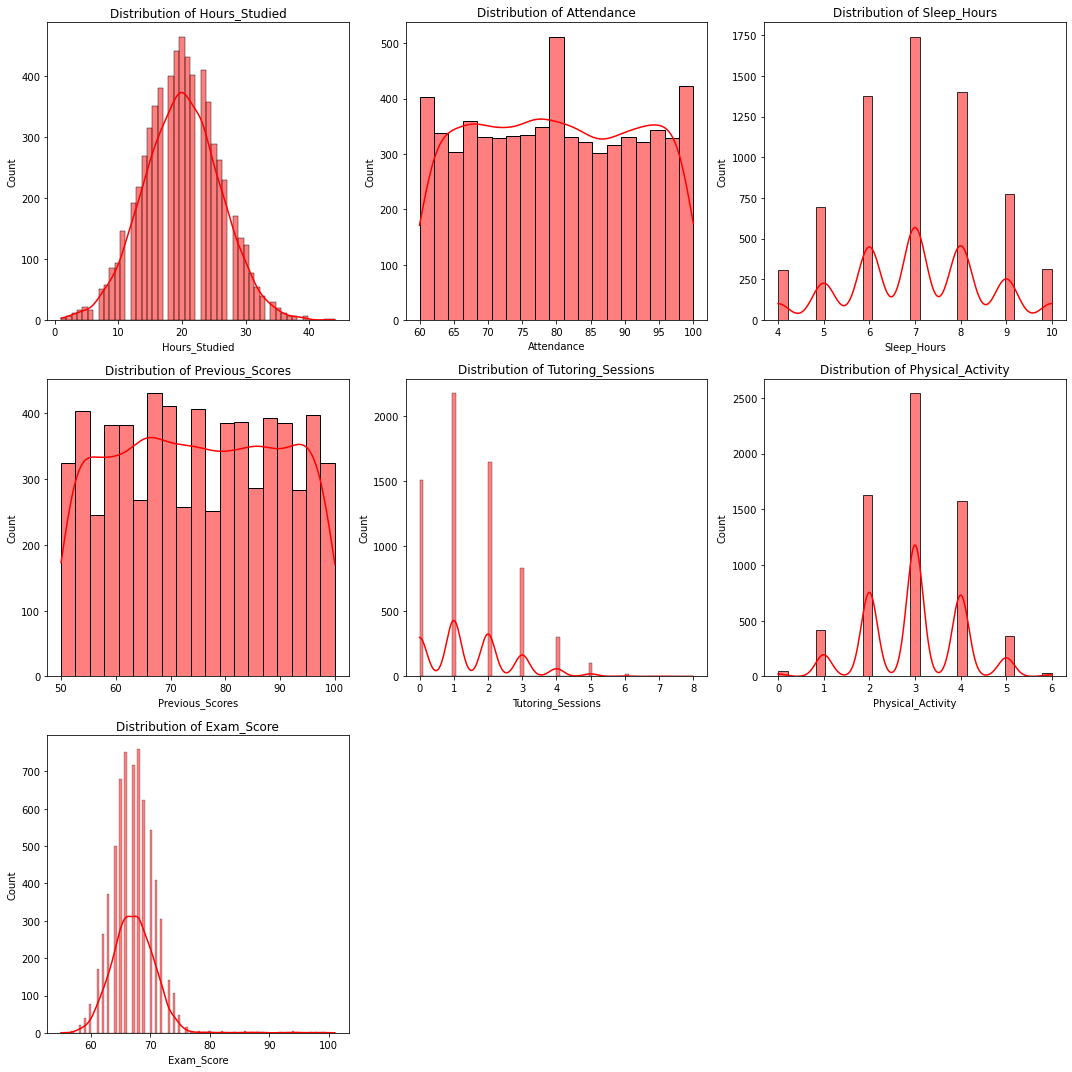

In [26]:
plot_all_distplots(df.select_dtypes('int'))

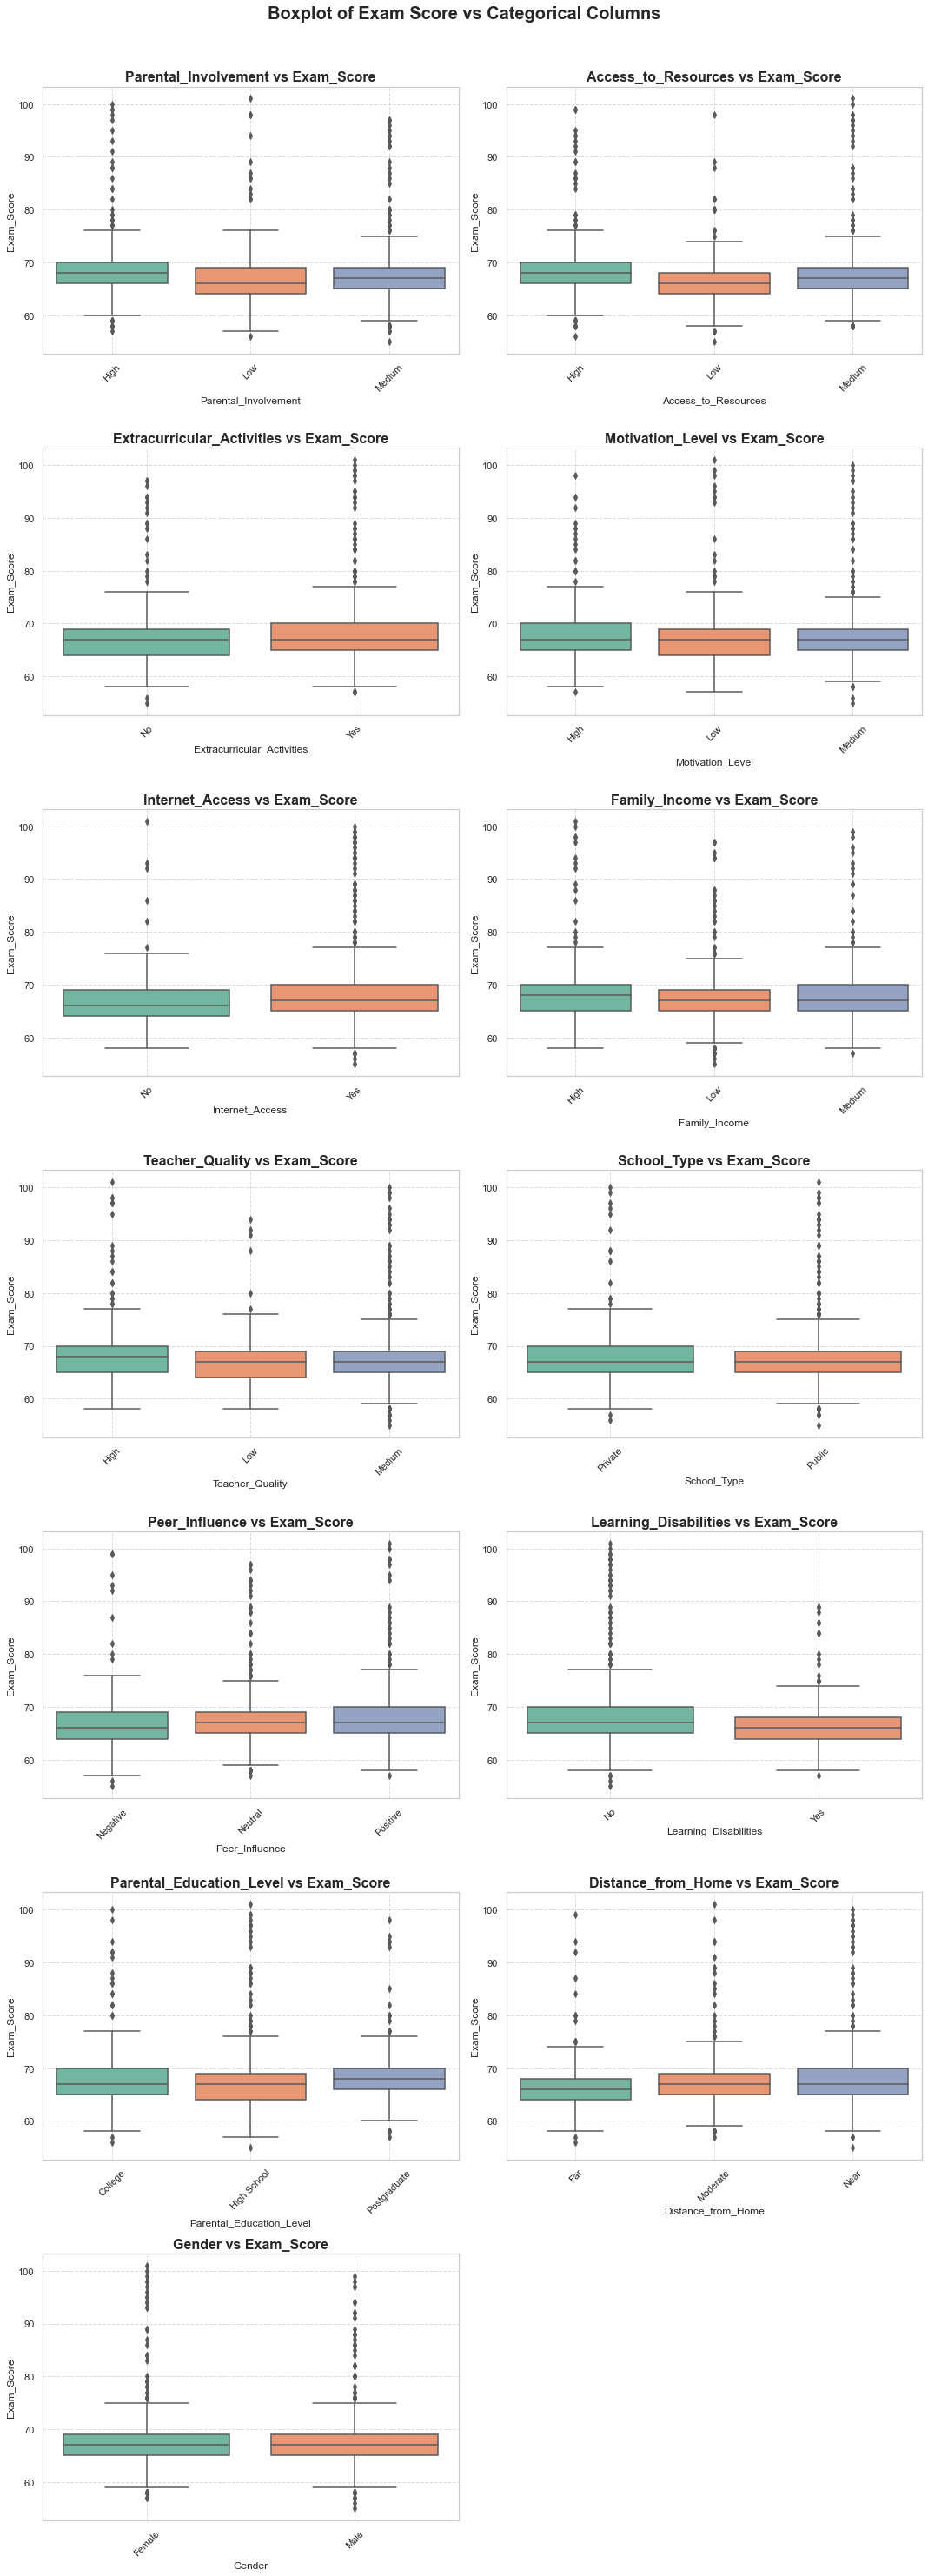

In [27]:
plot_boxplots_with_exam_score(df)

## Data cleaning 

In [28]:
knowing_nulls_duplicate(df)

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Data have 235 null value
-----------------------------------------------------------------------------------------------------

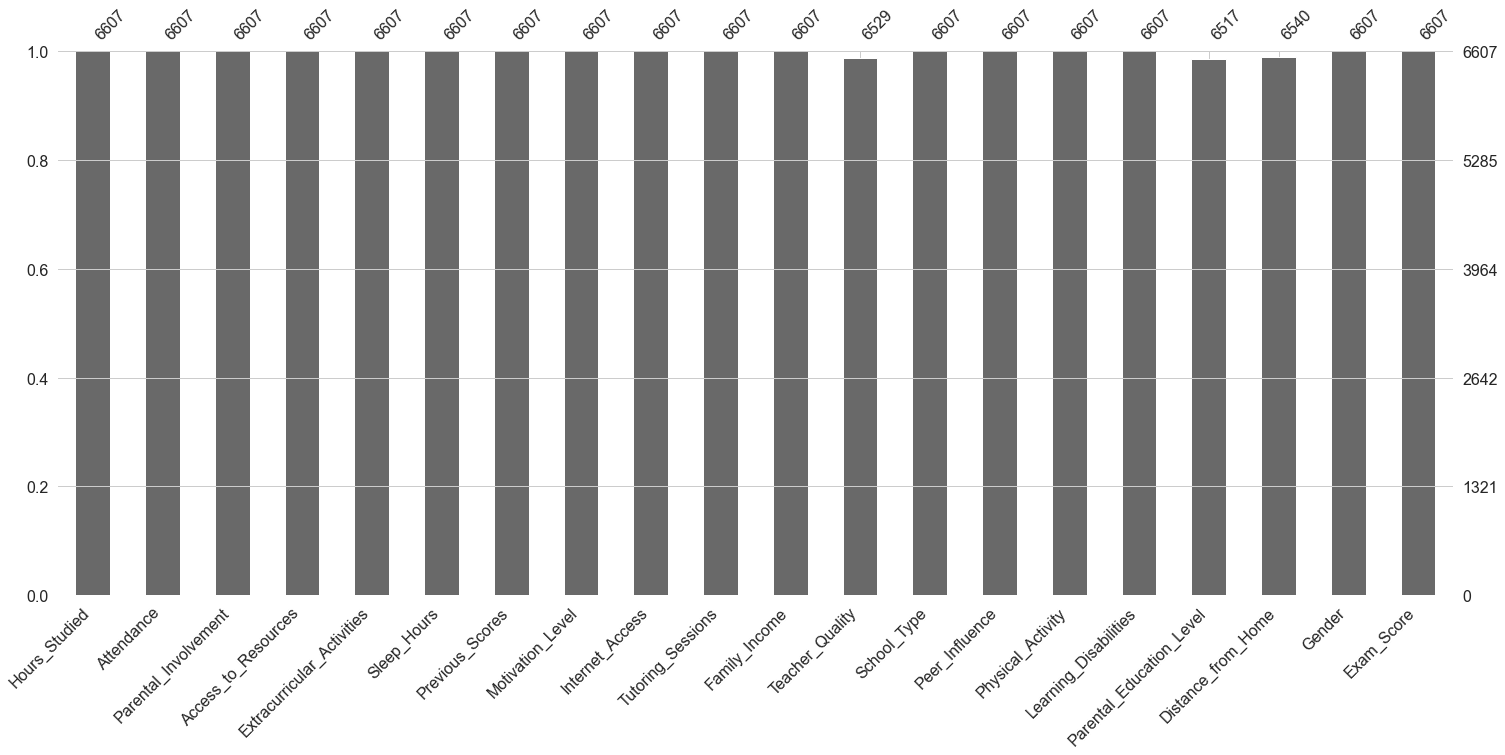

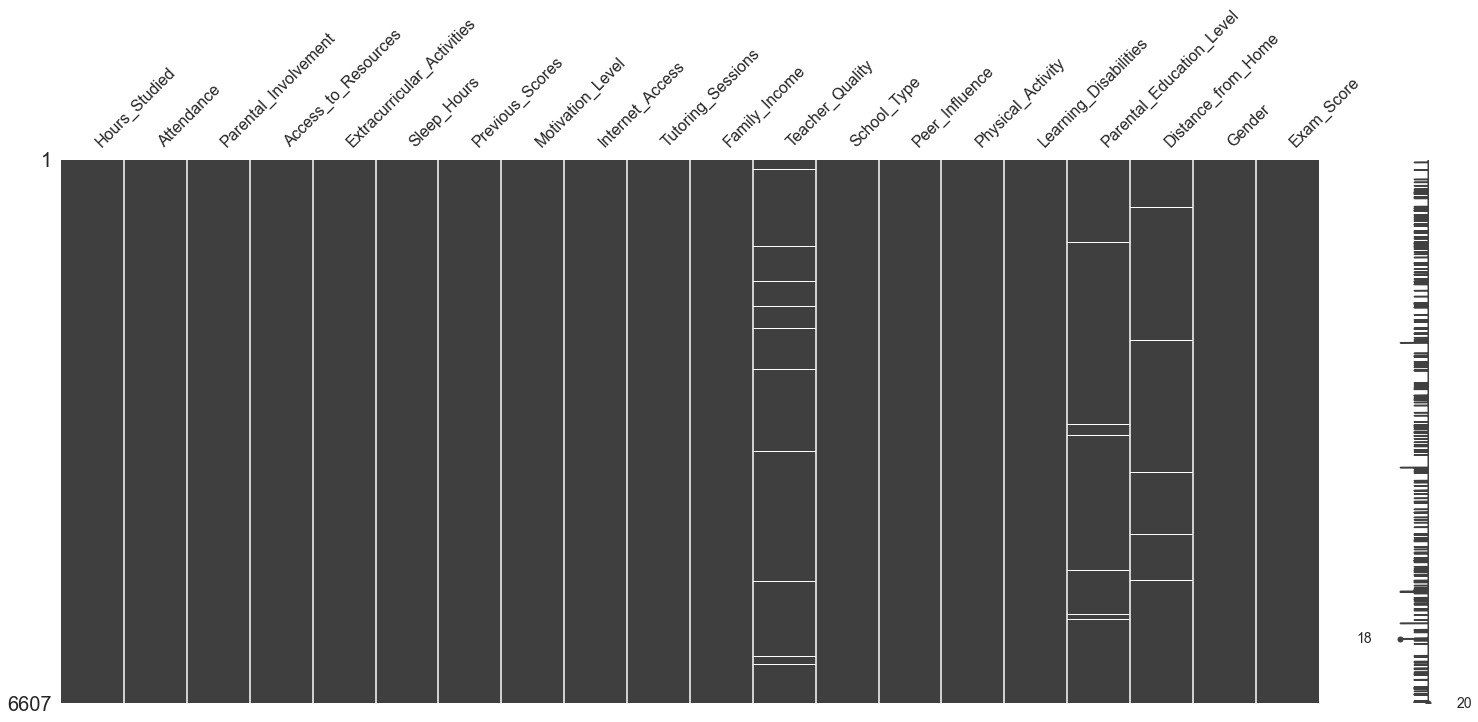

In [29]:
null_bar,null_matrix=plot_null_value(df)

**No duplicate in Data**

## Treat nulls 

In [30]:
for i in df[['Teacher_Quality','Parental_Education_Level','Distance_from_Home']]:
    count=df[i].value_counts().index[0]
    print(f'the most frequent value in the column {i} is {count}')

the most frequent value in the column Teacher_Quality is Medium
the most frequent value in the column Parental_Education_Level is High School
the most frequent value in the column Distance_from_Home is Near


In [31]:
df['Teacher_Quality'].fillna('Medium',inplace=True)
df['Parental_Education_Level'].fillna('High School',inplace=True)
df['Distance_from_Home'].fillna('Near',inplace=True)

In [32]:
df.isnull().sum().sum()

0

## knowing outliers 

In [33]:
knowing_outliers(df)

['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']

In [34]:
for i in df[['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score']]:
    df[i]=treat_outliers(df,i)

In [35]:
knowing_outliers(df)

[]

**now outliers in `detected`** 

## Machine Learning 

In [36]:
new_df=pd.get_dummies(df, drop_first=True,dtype='int')

In [37]:
new_df

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23.0,84,7,73,0.5,3,67.0,1,0,0,...,1,1,0,1,0,1,0,0,1,1
1,19.0,64,8,59,2.0,4,63.0,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,24.0,98,7,91,2.0,4,74.0,0,1,0,...,1,1,1,0,0,0,1,0,1,1
3,29.0,89,8,98,1.0,4,71.0,1,0,0,...,1,1,0,0,0,1,0,1,0,1
4,19.0,92,6,65,3.0,4,70.0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69,7,76,1.0,2,68.0,0,0,0,...,1,1,0,1,0,1,0,0,1,0
6603,23.0,76,8,81,3.0,2,69.0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
6604,20.0,90,6,65,3.0,2,68.0,0,1,1,...,1,1,0,0,0,0,1,0,1,0
6605,12.0,86,6,91,2.0,3,68.0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [40]:
new_df.corr().loc['Exam_Score']

Hours_Studied                            0.489936
Attendance                               0.655617
Sleep_Hours                             -0.012767
Previous_Scores                          0.191519
Tutoring_Sessions                        0.163587
Physical_Activity                        0.030313
Exam_Score                               1.000000
Parental_Involvement_Low                -0.125869
Parental_Involvement_Medium             -0.036229
Access_to_Resources_Low                 -0.141078
Access_to_Resources_Medium              -0.037136
Extracurricular_Activities_Yes           0.066415
Motivation_Level_Low                    -0.086124
Motivation_Level_Medium                  0.025913
Internet_Access_Yes                      0.061580
Family_Income_Low                       -0.086452
Family_Income_Medium                     0.026513
Teacher_Quality_Low                     -0.046127
Teacher_Quality_Medium                  -0.043888
School_Type_Public                      -0.011219


In [41]:
scaler=StandardScaler()
model=LinearRegression()
linear_regression_model_plotly(new_df,scaler,model)

Mean Squared Error (MSE): 1.472
R² Score: 0.851


LinearRegression()

In [42]:
new_df.columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Extracurricular_Activities_Yes', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Internet_Access_Yes', 'Family_Income_Low',
       'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'School_Type_Public', 'Peer_Influence_Neutral',
       'Peer_Influence_Positive', 'Learning_Disabilities_Yes',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate',
       'Distance_from_Home_Near', 'Gender_Male'],
      dtype='object')

In [43]:
with open('saved_linear_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('saved_scaler_linear.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

## Deployment Gui

In [ ]:
from tkinter import ttk
from tkinter import messagebox
from PIL import Image, ImageTk
import pickle
import numpy as np

# Load model and scaler
with open('saved_linear_model_new.pkl', 'rb') as model_file:
    model = pickle.load(model_file)
with open('saved_scaler_linear_new.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

expected_columns = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
    'Tutoring_Sessions', 'Physical_Activity', 'Parental_Involvement_Low',
    'Parental_Involvement_Medium', 'Access_to_Resources_Low', 
    'Access_to_Resources_Medium', 'Extracurricular_Activities_Yes',
    'Motivation_Level_Low', 'Motivation_Level_Medium', 'Internet_Access_Yes', 
    'Family_Income_Low', 'Family_Income_Medium', 'Teacher_Quality_Low',
    'Teacher_Quality_Medium', 'School_Type_Public', 'Peer_Influence_Neutral',
    'Peer_Influence_Positive', 'Learning_Disabilities_Yes',
    'Parental_Education_Level_High School', 'Parental_Education_Level_Postgraduate',
    'Distance_from_Home_Moderate', 'Distance_from_Home_Near', 'Gender_Male'
]

def submit_values():
    try:
        features = [
            float(entry_hours_studied.get()), float(entry_attendance.get()), 
            float(entry_sleep_hours.get()), float(entry_previous_scores.get()), 
            float(entry_tutoring_sessions.get()), float(entry_physical_activity.get()),
            1 if var_parental_involvement.get() == "Low" else 0, 
            1 if var_parental_involvement.get() == "Medium" else 0, 
            1 if var_access_to_resources.get() == "Low" else 0, 
            1 if var_access_to_resources.get() == "Medium" else 0, 
            1 if var_extracurricular_activities.get() == "Yes" else 0, 
            1 if var_motivation_level.get() == "Low" else 0, 
            1 if var_motivation_level.get() == "Medium" else 0, 
            1 if var_internet_access.get() == "Yes" else 0, 
            1 if var_family_income.get() == "Low" else 0, 
            1 if var_family_income.get() == "Medium" else 0, 
            1 if var_teacher_quality.get() == "Low" else 0, 
            1 if var_teacher_quality.get() == "Medium" else 0, 
            1 if var_school_type.get() == "Public" else 0, 
            1 if var_peer_influence.get() == "Neutral" else 0, 
            1 if var_peer_influence.get() == "Positive" else 0, 
            1 if var_learning_disabilities.get() == "Yes" else 0, 
            1 if var_parental_education_level.get() == "High School" else 0, 
            1 if var_parental_education_level.get() == "Postgraduate" else 0, 
            1 if var_distance_from_home.get() == "Moderate" else 0, 
            1 if var_distance_from_home.get() == "Near" else 0, 
            1 if var_gender.get() == "Male" else 0
        ]
        
        features_array = np.array([features])
        
        if features_array.shape[1] != len(expected_columns):
            messagebox.showerror("Error", "Feature count mismatch.")
            return
        
        features_scaled = scaler.transform(features_array)
        predicted_exam_score = model.predict(features_scaled)

        messagebox.showinfo("Prediction Result", f"Predicted Exam Score: {predicted_exam_score[0]:.2f}")

    except ValueError as e:
        messagebox.showerror("Error", f"Error: {str(e)}")
    except Exception as e:
        messagebox.showerror("Error", f"An unexpected error occurred: {str(e)}")

root = tk.Tk()
root.title("Student Performance Prediction")
root.state('zoomed')

canvas = tk.Canvas(root)
canvas.pack(fill='both', expand=True)

def resize_background(event):
    bg_image = Image.open("pexels-pixabay-256490.jpg")
    bg_image = bg_image.resize((event.width, event.height), Image.LANCZOS)
    bg_photo = ImageTk.PhotoImage(bg_image)
    canvas.delete("bg_image")
    canvas.create_image(0, 0, image=bg_photo, anchor='nw', tags="bg_image")
    canvas.image = bg_photo

canvas.bind("<Configure>", resize_background)

main_frame = tk.Frame(root, bg="#f0f0f0")
main_frame.place(relx=0.5, rely=0.5, anchor='center')

title_label = tk.Label(main_frame, text="Students Degree Prediction", font=("Helvetica", 16, "bold"), bg="#f0f0f0", fg="black")
title_label.pack(pady=10)

input_frame = tk.Frame(main_frame, bg="white", padx=10, pady=10)
input_frame.pack(pady=10)

button_frame = tk.Frame(main_frame, bg="white", pady=10)
button_frame.pack(pady=10)

def add_label_and_entry(label_text, parent_frame):
    frame = tk.Frame(parent_frame, bg="#f0f0f0")
    frame.pack(fill='x', pady=5)
    label = tk.Label(frame, text=label_text, bg="#f0f0f0", font=("Helvetica", 10, "bold"), anchor='w')
    label.pack(side='left', padx=10, fill='x', expand=True)
    entry = ttk.Entry(frame, width=20)
    entry.pack(side='right', padx=10, fill='x', expand=True)
    return entry

entry_hours_studied = add_label_and_entry("Hours Studied:", input_frame)
entry_attendance = add_label_and_entry("Attendance:", input_frame)
entry_sleep_hours = add_label_and_entry("Sleep Hours:", input_frame)
entry_previous_scores = add_label_and_entry("Previous Scores:", input_frame)
entry_tutoring_sessions = add_label_and_entry("Tutoring Sessions:", input_frame)
entry_physical_activity = add_label_and_entry("Physical Activity:", input_frame)

def add_label_and_combobox(label_text, parent_frame, options):
    frame = tk.Frame(parent_frame, bg="#f0f0f0")
    frame.pack(fill='x', pady=5)
    label = tk.Label(frame, text=label_text, bg="#f0f0f0", font=("Helvetica", 10, "bold"), anchor='w')
    label.pack(side='left', padx=10, fill='x', expand=True)
    var = tk.StringVar()
    combobox = ttk.Combobox(frame, textvariable=var, values=options, width=18)
    combobox.pack(side='right', padx=10, fill='x', expand=True)
    combobox.current(0)
    return var

var_parental_involvement = add_label_and_combobox("Parental Involvement:", input_frame, ["Low", "Medium", "High"])
var_access_to_resources = add_label_and_combobox("Access to Resources:", input_frame, ["Low", "Medium", "High"])
var_extracurricular_activities = add_label_and_combobox("Extracurricular Activities:", input_frame, ["Yes", "No"])
var_motivation_level = add_label_and_combobox("Motivation Level:", input_frame, ["Low", "Medium", "High"])
var_internet_access = add_label_and_combobox("Internet Access:", input_frame, ["Yes", "No"])
var_family_income = add_label_and_combobox("Family Income:", input_frame, ["Low", "Medium", "High"])
var_teacher_quality = add_label_and_combobox("Teacher Quality:", input_frame, ["Low", "Medium", "High"])
var_school_type = add_label_and_combobox("School Type:", input_frame, ["Public", "Private"])
var_peer_influence = add_label_and_combobox("Peer Influence:", input_frame, ["Neutral", "Positive", "Negative"])
var_learning_disabilities = add_label_and_combobox("Learning Disabilities:", input_frame, ["Yes", "No"])
var_parental_education_level = add_label_and_combobox("Parental Education Level:", input_frame, ["High School", "Undergraduate", "Postgraduate"])
var_distance_from_home = add_label_and_combobox("Distance from Home:", input_frame, ["Near", "Moderate", "Far"])
var_gender = add_label_and_combobox("Gender:", input_frame, ["Male", "Female"])

submit_button = tk.Button(button_frame, text="Submit", command=submit_values, bg="#4CAF50", fg="white", font=("Helvetica", 12, "bold"))
submit_button.pack(pady=10)

root.mainloop()


## Deployment Streamlit

In [ ]:
import streamlit as st
import pickle
import numpy as np
import plotly.graph_objects as go
from PIL import Image

# Load model and scaler
with open("C:/Users/Ayman/Downloads/saved_linear_model_new.pkl", 'rb') as model_file:
    model = pickle.load(model_file)

with open("C:/Users/Ayman/Downloads/saved_scaler_linear_new.pkl", 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Set page config
st.set_page_config(page_title="Student Performance Prediction", layout="wide")

# Custom CSS for styling
st.markdown("""
    <style>
    body {
        background-image: url('C:/Users/Ayman/Downloads/WhatsApp Image 2024-09-24 at 16.27.31_0cfd7f07.jpg');
        background-size: cover;
        color: white;
    }
    .stButton>button {
        background-color: #4CAF50; /* Green */
        color: white;
        padding: 10px 20px;
        border: none;
        border-radius: 5px;
        cursor: pointer;
        transition: background-color 0.3s, color 0.3s;
    }
    .stButton>button:hover {
        background-color: #45a049;
        color: white; /* Keep text white on hover */
    }
    .input-section, .prediction-section, .visualization-section {
        background-color: rgba(0, 0, 0, 0.7);
        border-radius: 5px;
        padding: 20px;
        margin-bottom: 20px;
        color: white;
    }
    .feature-icon {
        display: flex;
        align-items: center;
        gap: 10px;
        padding: 10px;
        background-color: rgba(255, 255, 255, 0.2);
        border-radius: 5px;
        margin-bottom: 10px;
    }
    </style>
""", unsafe_allow_html=True)

# Streamlit UI
st.title("Student Performance Prediction")
st.image("C:/Users/Ayman/Downloads/R (6).jpeg", use_column_width=True)

# Input Section
st.header("Enter Student Details:")
st.markdown("<div class='input-section'>", unsafe_allow_html=True)

# Collecting user input
hours_studied = st.number_input("Hours Studied:", min_value=0.0)
attendance = st.number_input("Attendance:", min_value=0.0)
sleep_hours = st.number_input("Sleep Hours:", min_value=0.0)
previous_scores = st.number_input("Previous Scores:", min_value=0.0)
tutoring_sessions = st.number_input("Tutoring Sessions:", min_value=0.0)
physical_activity = st.number_input("Physical Activity:", min_value=0.0)

parental_involvement = st.selectbox("Parental Involvement:", ["Low", "Medium", "High"])
access_to_resources = st.selectbox("Access to Resources:", ["Low", "Medium", "High"])
extracurricular_activities = st.selectbox("Extracurricular Activities:", ["Yes", "No"])
motivation_level = st.selectbox("Motivation Level:", ["Low", "Medium", "High"])
internet_access = st.selectbox("Internet Access:", ["Yes", "No"])
family_income = st.selectbox("Family Income:", ["Low", "Medium", "High"])
teacher_quality = st.selectbox("Teacher Quality:", ["Low", "Medium", "High"])
school_type = st.selectbox("School Type:", ["Public", "Private"])
peer_influence = st.selectbox("Peer Influence:", ["Neutral", "Positive", "Negative"])
learning_disabilities = st.selectbox("Learning Disabilities:", ["Yes", "No"])
parental_education_level = st.selectbox("Parental Education Level:", ["High School", "Undergraduate", "Postgraduate"])
distance_from_home = st.selectbox("Distance from Home:", ["Near", "Moderate", "Far"])
gender = st.selectbox("Gender:", ["Male", "Female"])

st.markdown("</div>", unsafe_allow_html=True)

# Prediction Section
st.header("Prediction")
st.markdown("<div class='prediction-section'>", unsafe_allow_html=True)

predicted_exam_score = None  # Initialize the predicted_exam_score variable

# Submit button
if st.button("Submit"):
    try:
        # Convert inputs to features list
        features = [
            hours_studied, attendance, sleep_hours, previous_scores, tutoring_sessions, physical_activity,
            1 if parental_involvement == "Low" else 0,
            1 if parental_involvement == "Medium" else 0,
            1 if access_to_resources == "Low" else 0,
            1 if access_to_resources == "Medium" else 0,
            1 if extracurricular_activities == "Yes" else 0,
            1 if motivation_level == "Low" else 0,
            1 if motivation_level == "Medium" else 0,
            1 if internet_access == "Yes" else 0,
            1 if family_income == "Low" else 0,
            1 if family_income == "Medium" else 0,
            1 if teacher_quality == "Low" else 0,
            1 if teacher_quality == "Medium" else 0,
            1 if school_type == "Public" else 0,
            1 if peer_influence == "Neutral" else 0,
            1 if peer_influence == "Positive" else 0,
            1 if learning_disabilities == "Yes" else 0,
            1 if parental_education_level == "High School" else 0,
            1 if parental_education_level == "Postgraduate" else 0,
            1 if distance_from_home == "Moderate" else 0,
            1 if distance_from_home == "Near" else 0,
            1 if gender == "Male" else 0
        ]

        features_array = np.array([features])

        # Scale features and make prediction
        features_scaled = scaler.transform(features_array)
        predicted_exam_score = model.predict(features_scaled)

        st.success(f"Predicted Exam Score: {predicted_exam_score[0]:.2f}")

        # Celebratory effects if score is >= 50
        if predicted_exam_score[0] >= 50:
            st.balloons()
        else:
            st.error("The predicted score is below 50. Please consider improving!")
            st.snow()  # Snow effect to simulate sadness

    except ValueError as e:
        st.error(f"Error: {str(e)}")
    except Exception as e:
        st.error(f"An unexpected error occurred: {str(e)}")

st.markdown("</div>", unsafe_allow_html=True)

# Visualization Section
st.header("Visualizations")
st.markdown("<div class='visualization-section'>", unsafe_allow_html=True)

if predicted_exam_score is not None:
    # Donut chart of predicted score
    fig = go.Figure(data=[go.Pie(
        labels=["Predicted Score", "Remaining Score"],
        values=[predicted_exam_score[0], 100 - predicted_exam_score[0]],
        hole=0.6,
        marker=dict(colors=['red', '#D2B48C']),
    )])
    fig.update_layout(title_text='Predicted Exam Score Distribution')
    st.plotly_chart(fig)

    # Feature Icons
    feature_icons = {
        "Sleep Hours": (r"C:\Users\Ayman\Pictures\Screenshots\Screenshot 2024-10-02 005621.png", sleep_hours, 6, 8),
        "Hours Studied": (r"C:\Users\Ayman\Pictures\Screenshots\Screenshot 2024-10-02 005644.png", hours_studied, 2, 5),
        "Attendance": (r"C:\Users\Ayman\Pictures\Screenshots\Screenshot 2024-10-02 005720.png", attendance, 75, 90),
        # Add other features here with corresponding icons and thresholds
    }

    for feature_name, (icon_path, value, low_threshold, high_threshold) in feature_icons.items():
        icon = Image.open(icon_path)
        st.markdown("<div class='feature-icon'>", unsafe_allow_html=True)
        st.image(icon, width=50)
        st.write(f"{feature_name}: {value}")

        # Indicate whether the value is low, moderate, or good
        if value < low_threshold:
            st.markdown("<span style='color: red;'>Low</span>", unsafe_allow_html=True)
        elif low_threshold <= value <= high_threshold:
            st.markdown("<span style='color: orange;'>Moderate</span>", unsafe_allow_html=True)
        else:
            st.markdown("<span style='color: green;'>Good</span>", unsafe_allow_html=True)

        st.markdown("</div>", unsafe_allow_html=True)

st.markdown("</div>", unsafe_allow_html=True)

# Display advice for students
st.header("Advice for you")

if predicted_exam_score is not None:
    st.markdown("<div class='visualization-section'>", unsafe_allow_html=True)

    if predicted_exam_score[0] >= 50:
        st.success("Congratulations! You have passed. Here are some tips to further improve:")
        st.write("- Continue to maintain a good study schedule.")
        st.write("- Stay consistent with your attendance and physical activities.")
        st.write("- Keep your motivation levels high and seek help when needed.")
    else:
        st.warning("Dear student, it seems you did not achieve the score you hoped for. Don't lose hope! Here are some tips to improve your performance in the future:")
        st.write("- Study regularly and focus on the subjects you need to improve.")
        st.write("- Try to understand your weaknesses and seek help from teachers or friends.")
        st.write("- Use mistakes as learning opportunities and don’t hesitate to try again.")
        st.write("- Remember that success requires patience and perseverance, and every step brings you closer to your goal.")
        st.write("- Organize your time better and stay motivated to achieve your dreams.")
st.markdown("<div style='text-align: center; color: black; font-style: italic;'>elmano</div>", unsafe_allow_html=True)    
